<a href="https://colab.research.google.com/github/quantwav/Project-dsff/blob/main/0321_1430_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [14]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

In [33]:
if not os.path.exists("crime_data_2023demo.csv"):
    !gdown 1Go5pIawzN3YUkVUivCk8OD_Q35mGjAyD

In [36]:
df_raw_crime = (
    pd.read_csv('crime_data_2023demo.csv',parse_dates=['dispatch_date'])
)
df_raw_crime.drop(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid',  'dc_key', 'dc_dist', 'psa', 'ucr_general', 'lat', 'lng'], axis=1, inplace=True)
df_raw_crime.rename(columns= {'point_x':'X', 'point_y':'Y', 'text_general_code':'Category' }, inplace = True)
df_raw_crime

dispatch_date_time dispatch_date dispatch_time  hour  \
0     2023-01-01 01:29:00+00    2022-12-31      20:29:00    20   
1     2023-01-01 01:33:00+00    2022-12-31      20:33:00    20   
2     2023-01-01 00:31:00+00    2022-12-31      19:31:00    19   
3     2023-01-01 01:43:00+00    2022-12-31      20:43:00    20   
4     2023-01-01 02:07:00+00    2022-12-31      21:07:00    21   
...                      ...           ...           ...   ...   
1827  2023-01-05 01:41:00+00    2023-01-04      20:41:00    20   
1828  2023-01-04 13:16:00+00    2023-01-04       8:16:00     8   
1829  2023-01-04 17:05:00+00    2023-01-04      12:05:00    12   
1830  2023-01-04 05:00:00+00    2023-01-04       0:00:00     1   
1831  2023-01-04 05:00:00+00    2023-01-04       0:00:00    22   

                   location_block             Category          X          Y  
0              900 BLOCK SOUTH ST               Thefts -75.158541  39.943220  
1           4000 BLOCK COTTMAN AV               Thefts -75.040025  40.036089  
2            7400 BLOCK OXFORD AV               Thefts -75.083517  40.063766  
3     4600 BLOCK E ROOSEVELT BLVD               Thefts -75.102382  40.032128  
4      2700 BLOCK KENSINGTON AV 2               Thefts -75.123884  39.989917  
...                           ...                  ...        ...        ...  
1827         6300 BLOCK N 18TH ST  Motor Vehicle Theft -75.148580  40.051393  
1828         6600 BLOCK DITMAN ST  Motor Vehicle Theft -75.049308  40.024360  
1829       400 BLOCK E ONTARIO ST  Motor Vehicle Theft -75.120611  40.000605  
1830        4700 BLOCK N BROAD ST  Homicide - Criminal -75.147935  40.024782  
1831          1600 BLOCK  DYRE ST  Homicide - Criminal -75.078720  40.020984  

[1832 rows x 8 columns]

In [37]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
df_raw_crime.drop_duplicates(inplace=True)
df_raw_crime.dropna()

# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

df_raw_crime

dispatch_date_time dispatch_date dispatch_time  hour  \
0     2023-01-01 01:29:00+00    2022-12-31      20:29:00    20   
1     2023-01-01 01:33:00+00    2022-12-31      20:33:00    20   
2     2023-01-01 00:31:00+00    2022-12-31      19:31:00    19   
3     2023-01-01 01:43:00+00    2022-12-31      20:43:00    20   
4     2023-01-01 02:07:00+00    2022-12-31      21:07:00    21   
...                      ...           ...           ...   ...   
1827  2023-01-05 01:41:00+00    2023-01-04      20:41:00    20   
1828  2023-01-04 13:16:00+00    2023-01-04       8:16:00     8   
1829  2023-01-04 17:05:00+00    2023-01-04      12:05:00    12   
1830  2023-01-04 05:00:00+00    2023-01-04       0:00:00     1   
1831  2023-01-04 05:00:00+00    2023-01-04       0:00:00    22   

                   location_block             Category          X          Y  
0              900 BLOCK SOUTH ST               Thefts -75.158541  39.943220  
1           4000 BLOCK COTTMAN AV               Thefts -75.040025  40.036089  
2            7400 BLOCK OXFORD AV               Thefts -75.083517  40.063766  
3     4600 BLOCK E ROOSEVELT BLVD               Thefts -75.102382  40.032128  
4      2700 BLOCK KENSINGTON AV 2               Thefts -75.123884  39.989917  
...                           ...                  ...        ...        ...  
1827         6300 BLOCK N 18TH ST  Motor Vehicle Theft -75.148580  40.051393  
1828         6600 BLOCK DITMAN ST  Motor Vehicle Theft -75.049308  40.024360  
1829       400 BLOCK E ONTARIO ST  Motor Vehicle Theft -75.120611  40.000605  
1830        4700 BLOCK N BROAD ST  Homicide - Criminal -75.147935  40.024782  
1831          1600 BLOCK  DYRE ST  Homicide - Criminal -75.078720  40.020984  

[1820 rows x 8 columns]

In [38]:
# Split the dataset into training and testing sets (80% training, 20% testing)
train, test = train_test_split(df_raw_crime, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(train))
print("Testing set size:", len(test))
train

Training set size: 1456
Testing set size: 364


dispatch_date_time dispatch_date dispatch_time  hour  \
296   2023-01-02 04:40:00+00    2023-01-01      23:40:00    23   
1417  2023-01-04 14:17:00+00    2023-01-04       9:17:00     9   
1561  2023-01-04 22:54:00+00    2023-01-04      17:54:00    17   
304   2023-01-02 02:05:00+00    2023-01-01      21:05:00    21   
1719  2023-01-04 05:56:00+00    2023-01-04       0:56:00     0   
...                      ...           ...           ...   ...   
1137  2023-01-03 21:24:00+00    2023-01-03      16:24:00    16   
1302  2023-01-03 18:25:00+00    2023-01-03      13:25:00    13   
867   2023-01-03 18:40:00+00    2023-01-03      13:40:00    13   
1469  2023-01-04 23:37:00+00    2023-01-04      18:37:00    18   
1133  2023-01-03 22:29:00+00    2023-01-03      17:29:00    17   

                  location_block                     Category          X  \
296        200 BLOCK W LEHIGH AV               Other Assaults -75.134871   
1417     1100 BLOCK FRANKFORD AV     Burglary Non-Residential -75.134425   
1561         7100 BLOCK TULIP ST  Vandalism/Criminal Mischief -75.037144   
304         2500 BLOCK S 10TH ST                        Fraud -75.164234   
1719         4000 BLOCK N 6TH ST           All Other Offenses -75.137505   
...                          ...                          ...        ...   
1137        6500 BLOCK GREENE ST               Other Assaults -75.191202   
1302         100 BLOCK LAUREL ST          Motor Vehicle Theft -75.139655   
867     5900 BLOCK WARRINGTON AV         Burglary Residential -75.234117   
1469         200 BLOCK ROBINA ST                       Thefts -75.036646   
1133  5300 BLOCK W MONTGOMERY AV                        Fraud -75.229469   

              Y  
296   39.991417  
1417  39.967604  
1561  40.026174  
304   39.917273  
1719  40.013720  
...         ...  
1137  40.043395  
1302  39.965037  
867   39.935833  
1469  40.116543  
1133  39.984486  

[1456 rows x 8 columns]

In [39]:
train.duplicated().sum()

0

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-40-13c5d8c4436a>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


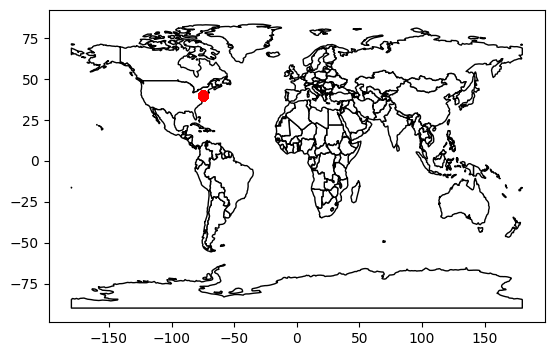

In [40]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(train_data):
    # Create a copy of the DataFrame
    gdf = train_data.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
train_gdf = create_gdf(train)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
train_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()


<ipython-input-41-3da43c9e537a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=incident_count_per_day, shade=True)


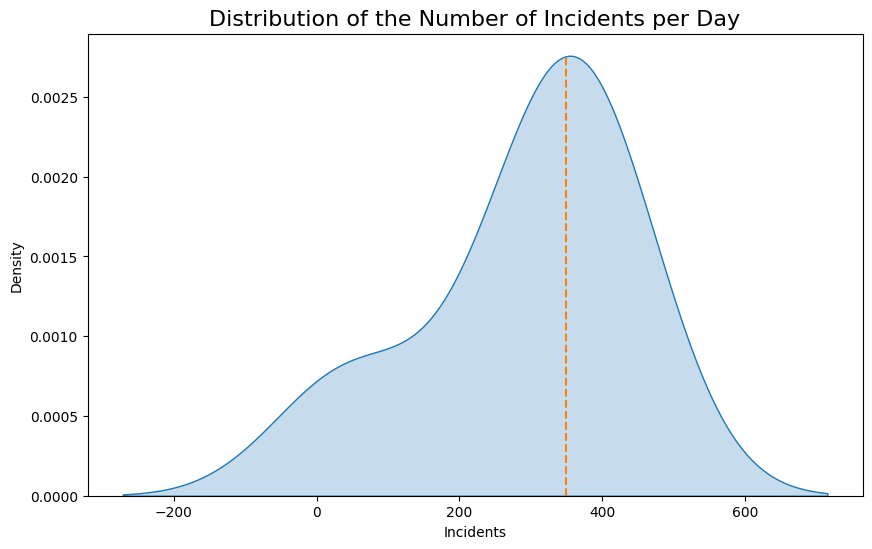

In [41]:
col = sns.color_palette()

# Calculate the date and hour
train['Date'] = train.dispatch_date.dt.date
train['Hour'] = train.dispatch_date.dt.hour

# Create the figure
plt.figure(figsize=(10, 6))

# Calculate the number of incidents per day and generate a kernel density plot
incident_count_per_day = train.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=incident_count_per_day, shade=True)

# Plot a dashed line at the median and add annotation
median_value = incident_count_per_day.median()
plt.axvline(x=median_value, ymax=0.95, linestyle='--', color=col[1])
plt.annotate('Median: ' + str(median_value),
             xy=(median_value, 0.004),
             xytext=(median_value + 200, 0.005),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# Set the title and axis labels
plt.title('Distribution of the Number of Incidents per Day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()


In [42]:
# Extract the weekday information from the 'dispatch_date' column and assign it to a new column 'weekday'
train['weekday'] = train['dispatch_date'].dt.weekday

# Define a mapping between numerical representation of weekdays and their corresponding names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the numerical representation of weekdays to their corresponding names using the mapping defined above
train['weekday'] = train['weekday'].map(weekday_mapping)

# Display the DataFrame with the added 'weekday' column containing the names of weekdays
train


dispatch_date_time dispatch_date dispatch_time  hour  \
296   2023-01-02 04:40:00+00    2023-01-01      23:40:00    23   
1417  2023-01-04 14:17:00+00    2023-01-04       9:17:00     9   
1561  2023-01-04 22:54:00+00    2023-01-04      17:54:00    17   
304   2023-01-02 02:05:00+00    2023-01-01      21:05:00    21   
1719  2023-01-04 05:56:00+00    2023-01-04       0:56:00     0   
...                      ...           ...           ...   ...   
1137  2023-01-03 21:24:00+00    2023-01-03      16:24:00    16   
1302  2023-01-03 18:25:00+00    2023-01-03      13:25:00    13   
867   2023-01-03 18:40:00+00    2023-01-03      13:40:00    13   
1469  2023-01-04 23:37:00+00    2023-01-04      18:37:00    18   
1133  2023-01-03 22:29:00+00    2023-01-03      17:29:00    17   

                  location_block                     Category          X  \
296        200 BLOCK W LEHIGH AV               Other Assaults -75.134871   
1417     1100 BLOCK FRANKFORD AV     Burglary Non-Residential -75.134425   
1561         7100 BLOCK TULIP ST  Vandalism/Criminal Mischief -75.037144   
304         2500 BLOCK S 10TH ST                        Fraud -75.164234   
1719         4000 BLOCK N 6TH ST           All Other Offenses -75.137505   
...                          ...                          ...        ...   
1137        6500 BLOCK GREENE ST               Other Assaults -75.191202   
1302         100 BLOCK LAUREL ST          Motor Vehicle Theft -75.139655   
867     5900 BLOCK WARRINGTON AV         Burglary Residential -75.234117   
1469         200 BLOCK ROBINA ST                       Thefts -75.036646   
1133  5300 BLOCK W MONTGOMERY AV                        Fraud -75.229469   

              Y        Date  Hour    weekday  
296   39.991417  2023-01-01     0     Sunday  
1417  39.967604  2023-01-04     0  Wednesday  
1561  40.026174  2023-01-04     0  Wednesday  
304   39.917273  2023-01-01     0     Sunday  
1719  40.013720  2023-01-04     0  Wednesday  
...         ...         ...   ...        ...  
1137  40.043395  2023-01-03     0    Tuesday  
1302  39.965037  2023-01-03     0    Tuesday  
867   39.935833  2023-01-03     0    Tuesday  
1469  40.116543  2023-01-04     0  Wednesday  
1133  39.984486  2023-01-03     0    Tuesday  

[1456 rows x 11 columns]

In [43]:
data = train.groupby('weekday').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
data

weekday
Monday       349.0
Tuesday      399.0
Wednesday    386.0
Thursday       NaN
Friday         NaN
Saturday      45.0
Sunday       277.0
Name: dispatch_date_time, dtype: float64

<ipython-input-51-da88dea73582>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-51-da88dea73582>:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


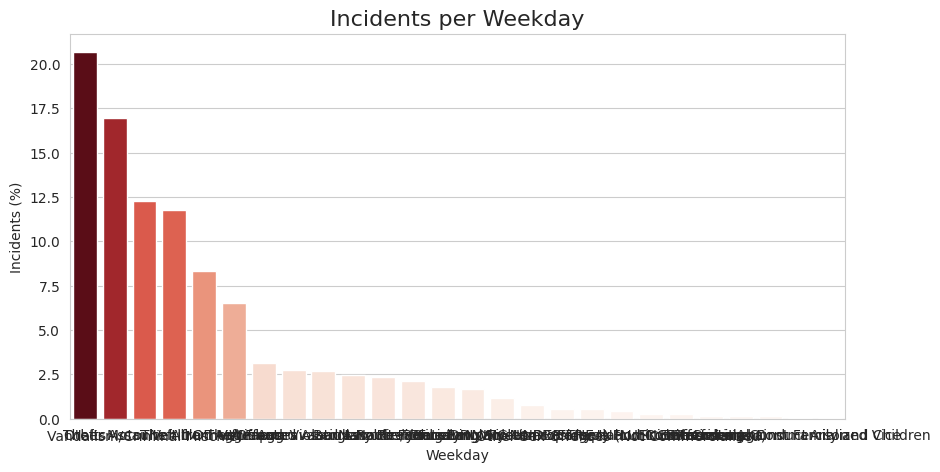

In [51]:
from matplotlib import cm  # Importing colormap module from matplotlib

plt.figure(figsize=(10, 5))  # Creating a figure with size 10x5 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a bar plot
    ax = sns.barplot(
        x = data.index,  # X-axis data (weekdays)
        y = (data.values / data.values.sum()) * 100,  # Y-axis data (percentage of incidents)
        orient='v',  # Orientation of the bars (vertical)
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values)  # Color palette for the bars
    )

# Setting title, xlabel, and ylabel
plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

# Displaying the plot
plt.show()


In [45]:
train

dispatch_date_time dispatch_date dispatch_time  hour  \
296   2023-01-02 04:40:00+00    2023-01-01      23:40:00    23   
1417  2023-01-04 14:17:00+00    2023-01-04       9:17:00     9   
1561  2023-01-04 22:54:00+00    2023-01-04      17:54:00    17   
304   2023-01-02 02:05:00+00    2023-01-01      21:05:00    21   
1719  2023-01-04 05:56:00+00    2023-01-04       0:56:00     0   
...                      ...           ...           ...   ...   
1137  2023-01-03 21:24:00+00    2023-01-03      16:24:00    16   
1302  2023-01-03 18:25:00+00    2023-01-03      13:25:00    13   
867   2023-01-03 18:40:00+00    2023-01-03      13:40:00    13   
1469  2023-01-04 23:37:00+00    2023-01-04      18:37:00    18   
1133  2023-01-03 22:29:00+00    2023-01-03      17:29:00    17   

                  location_block                     Category          X  \
296        200 BLOCK W LEHIGH AV               Other Assaults -75.134871   
1417     1100 BLOCK FRANKFORD AV     Burglary Non-Residential -75.134425   
1561         7100 BLOCK TULIP ST  Vandalism/Criminal Mischief -75.037144   
304         2500 BLOCK S 10TH ST                        Fraud -75.164234   
1719         4000 BLOCK N 6TH ST           All Other Offenses -75.137505   
...                          ...                          ...        ...   
1137        6500 BLOCK GREENE ST               Other Assaults -75.191202   
1302         100 BLOCK LAUREL ST          Motor Vehicle Theft -75.139655   
867     5900 BLOCK WARRINGTON AV         Burglary Residential -75.234117   
1469         200 BLOCK ROBINA ST                       Thefts -75.036646   
1133  5300 BLOCK W MONTGOMERY AV                        Fraud -75.229469   

              Y        Date  Hour    weekday  
296   39.991417  2023-01-01     0     Sunday  
1417  39.967604  2023-01-04     0  Wednesday  
1561  40.026174  2023-01-04     0  Wednesday  
304   39.917273  2023-01-01     0     Sunday  
1719  40.013720  2023-01-04     0  Wednesday  
...         ...         ...   ...        ...  
1137  40.043395  2023-01-03     0    Tuesday  
1302  39.965037  2023-01-03     0    Tuesday  
867   39.935833  2023-01-03     0    Tuesday  
1469  40.116543  2023-01-04     0  Wednesday  
1133  39.984486  2023-01-03     0    Tuesday  

[1456 rows x 11 columns]

In [46]:
data = train.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
#data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))
data

Category
Thefts                                     301
Other Assaults                             247
Vandalism/Criminal Mischief                179
Motor Vehicle Theft                        171
Theft from Vehicle                         121
All Other Offenses                          95
Fraud                                       46
Weapon Violations                           40
Aggravated Assault No Firearm               39
Aggravated Assault Firearm                  36
Burglary Residential                        34
Robbery Firearm                             31
Narcotic / Drug Law Violations              26
Robbery No Firearm                          24
Receiving Stolen Property                   17
Burglary Non-Residential                    11
DRIVING UNDER THE INFLUENCE                  8
Rape                                         8
Other Sex Offenses (Not Commercialized)      6
Forgery and Counterfeiting                   4
Homicide - Criminal                          4
Embezzlement                                 2
Disorderly Conduct                           2
Prostitution and Commercialized Vice         2
Offenses Against Family and Children         1
Arson                                        1
Name: dispatch_date_time, dtype: int64

<ipython-input-47-042d2660fdfd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


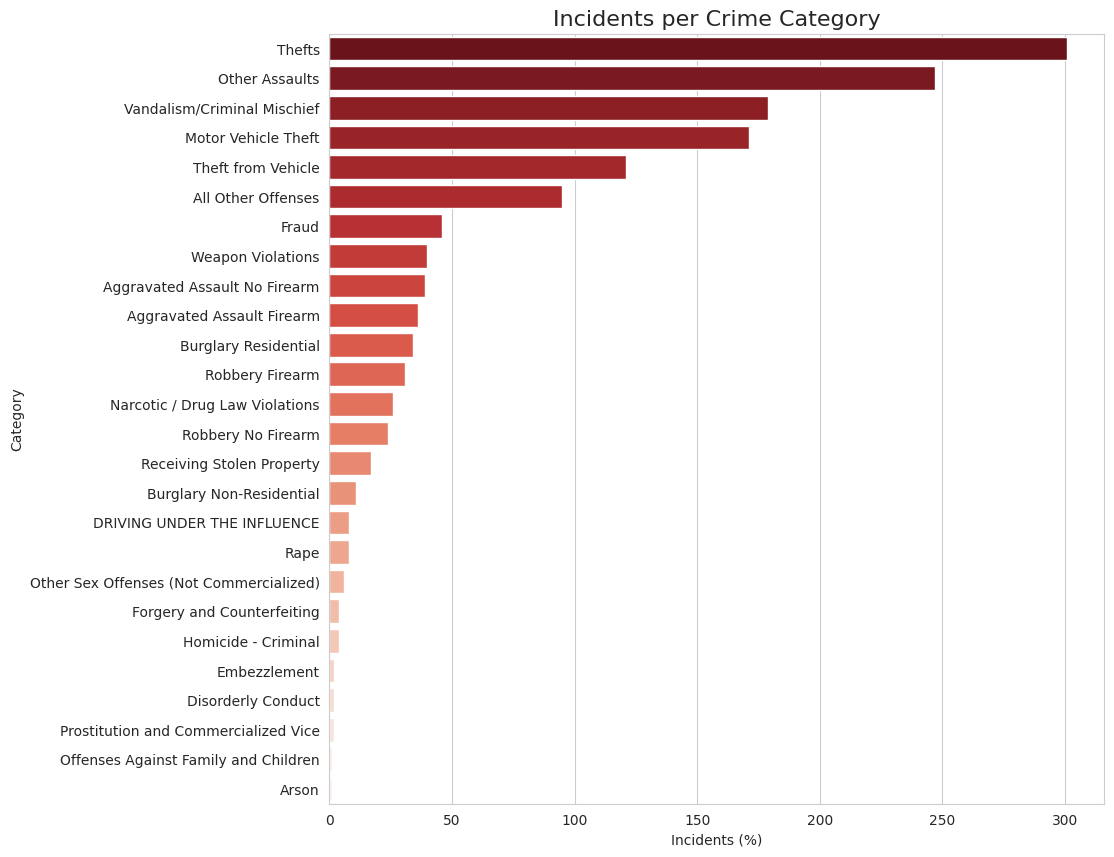

In [47]:
plt.figure(figsize=(10, 10))  # Creating a figure with size 10x10 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a horizontal bar plot
    ax = sns.barplot(
        x=data.values,  # X-axis data (percentage of incidents)
        y=data.index,  # Y-axis data (crime categories)
        orient='h',  # Orientation of the bars (horizontal)
        palette="Reds_r"  # Color palette for the bars (reversed 'Reds' colormap)
    )

# Setting title and xlabel
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

# Displaying the plot
plt.show()
